<a href="https://colab.research.google.com/github/annaluizacaraciolo/Ciencia_de_Dados/blob/main/Projeto1CienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anáise de qualidade do ar dos EUA entre 1980-2021
O dataset escolhido foi o 'US Air Quality 1980-Present', obitido através do Kaggle. O "Air Quality Index" (AQI) é o índice utilizado para medir a qualidade do ar, variando de 0 a 500. 

## Download do dataset



In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annaluiza","key":"55026d89e31cbc472fcedfb11362c3ac"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download data
! kaggle datasets download calebreigada/us-air-quality-1980present

 80% 33.0M/41.0M [00:00<00:00, 66.6MB/s]
100% 41.0M/41.0M [00:00<00:00, 74.3MB/s]


In [ ]:
# unzip data
!unzip us-air-quality-1980present

Archive:  us-air-quality-1980present.zip
  inflating: US_AQI.csv              


In [ ]:
import pandas as pd

data = pd.read_csv('US_AQI.csv')
data

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617320,5718366,49740,1980-12-27,52,Moderate,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617321,5718367,49740,1980-12-28,52,Moderate,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617322,5718368,49740,1980-12-29,24,Good,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix
5617323,5718369,49740,1980-12-30,14,Good,CO,1,Yuma,AZ,Arizona,32.5995,-114.5491,137612.0,311.0,America/Phoenix


## Pré processamento dos dados

In [ ]:
# Drop de colunas que não são relevantes 
# não rodar duas vezes, já que não se pode deletar o que já foi deletado
del data['state_id']
del data['timezone']
# data

In [ ]:
# criando dataframe com as linhas dos estados sob análise
df1 = data.query("state_name == 'Arizona'")
df2 = data.query("state_name == 'Hawaii'")
df3 = data.query("state_name == 'Tenessee'")
df4 = data.query("state_name == 'California'")
df5 = data.query("state_name == 'Texas'")
df6 = data.query("state_name == 'Pennsylvania'")
df7 = data.query("state_name == 'Alaska'")
df8 = data.query("state_name == 'Utah'")
df9 = data.query("state_name == 'Colorado'")
df10 = data.query("state_name == 'New York'")


In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(frames)

In [ ]:
df.reset_index()

,index,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,lat,lng,population,density
0,8001,8084,22380,2022-01-01,43,Good,Ozone,1,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0
1,8002,8085,22380,2022-01-02,42,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0
2,8003,8086,22380,2022-01-03,43,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0
3,8004,8087,22380,2022-01-04,42,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0
4,8005,8088,22380,2022-01-05,43,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543994,5611291,5712019,46540,1980-12-27,17,Good,CO,2,Utica,New York,43.0962,-75.2261,112948.0,1384.0
1543995,5611292,5712020,46540,1980-12-28,21,Good,Ozone,2,Utica,New York,43.0962,-75.2261,112948.0,1384.0
1543996,5611293,5712021,46540,1980-12-29,27,Good,CO,2,Utica,New York,43.0962,-75.2261,112948.0,1384.0
1543997,5611294,5712022,46540,1980-12-30,23,Good,CO,2,Utica,New York,43.0962,-75.2261,112948.0,1384.0


### Setando campos como categóricos

In [ ]:
df.dtypes

Unnamed: 0                     int64
CBSA Code                      int64
Date                          object
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
city_ascii                    object
state_name                    object
lat                          float64
lng                          float64
population                   float64
density                      float64
dtype: object

In [ ]:
# Ajustando os tipos "object" para tipo "category"
df['Date'] = df['Date'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Defining Parameter'] = df['Defining Parameter'].astype('category')
df['city_ascii'] = df['city_ascii'].astype('category')
df['state_name'] = df['state_name'].astype('category')

In [ ]:
df.dtypes

Unnamed: 0                      int64
CBSA Code                       int64
Date                         category
AQI                             int64
Category                     category
Defining Parameter           category
Number of Sites Reporting       int64
city_ascii                   category
state_name                   category
lat                           float64
lng                           float64
population                    float64
density                       float64
dtype: object

### Eliminando colunas com muitos valores vazios
Não existem colunas com algum valor vazio, como verificado abaixo. Por não possuir missing data, não vamos utilizar algum algoritmo para imputação. 

In [ ]:
print(df.isnull().sum())

Unnamed: 0                   0
CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Number of Sites Reporting    0
city_ascii                   0
state_name                   0
lat                          0
lng                          0
population                   0
density                      0
dtype: int64


### Normalização
A normalização é aplicada a dados numéricos que possuem escalas muito diferentes, pois isso pode levar a resultados dismórficos. No nosso dataframe, os dados numéricos são muitos e eles possuem escalas diferentes entre si.

In [ ]:
# analisar qual informação procuramos e se precisamos fazer uma normalização
# dos dados, pois perderemos nossos dados originais do df

### Discretizando

### Detecção de outliers

#### Removendo outliers com Z-Score robusto
Vamos agora detectar os Outliers para o parâmetro de densidade doa ar.</br>
<b>ATENÇÃO</b>: talvez seja mais interssante fazer do AQI.

In [ ]:
df['density'].describe()

count    1.543999e+06
mean     1.499218e+03
std      1.381451e+03
min      4.000000e+00
25%      7.190000e+02
50%      1.250000e+03
75%      1.786000e+03
max      1.076800e+04
Name: density, dtype: float64

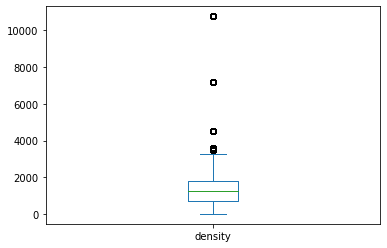

In [ ]:
df['density'].plot.box()

In [ ]:
df['AQI'].describe()

count    1.543999e+06
mean     5.256483e+01
std      5.137239e+01
min      0.000000e+00
25%      3.200000e+01
50%      4.400000e+01
75%      6.100000e+01
max      2.064600e+04
Name: AQI, dtype: float64

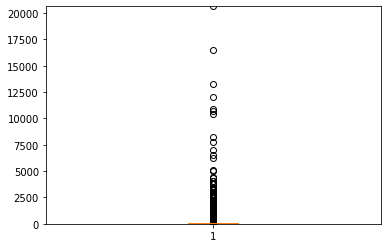

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['AQI'])
plt.axis([None, None, min(df['AQI']), max(df['AQI'])])
plt.show()

## Estatísticas descritivas

In [ ]:
# Vamos verificar a frequência de observações por estado
df['']

Vamos primeiro extrair valores de média, mediana e desvio padrão e plotar

In [ ]:
# vamos calcular a média, mediana e desvio padrão para algumas das nossas features

mediaAQI = df['AQI'].mean()
medianaAQI = df['AQI'].median()
sdAQI = df['AQI'].std()
print(" Média: {}\n Mediana: {}\n Desvio padrão: {}\n".format(mediaAQI, medianaAQI, sdAQI))

 Média: 52.564830029034994
 Mediana: 44.0
 Desvio padrão: 51.37238904948967



O gráfico abaixo nos indica que a média e mediana estão uniformes entre si, o que significa que a distribuição dos nossos dados é normal e provavelmente não contém outliers.

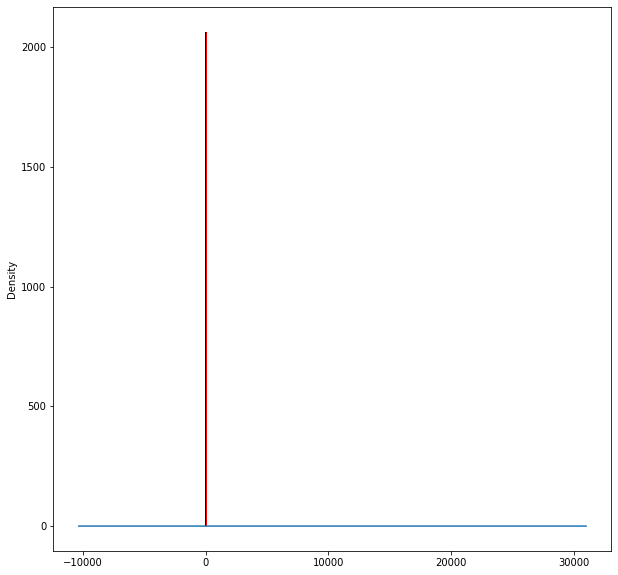

In [ ]:
df['AQI'].plot(kind='density', figsize=(10,10))

plt.vlines(df['AQI'].mean(),
           ymin=0,
           ymax=2064,
           linewidth=2);

plt.vlines(df['AQI'].median(),
           ymin = 0,
           ymax=2064,
           linewidth = 1,
           color='red',);

## Teste de hipótese